## Importación de librerías

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## Cargar datos


In [2]:
#df = pd.read_excel('Premier League 2011-12 Match by Match.xls')
df = pd.read_excel('../datos/Premier League 2011-12 Match by Match.xls')
df.head()

,Date,Player ID,Player Surname,Player Forename,Team,Team Id,Opposition,Opposition id,Venue,Position Id,...,Pass Left,Pass Right,Unsuccessful Ball Touch,Successful Ball Touch,Take-Ons Overrun,CompId,SeasId,Touches open play final third,Touches open play opp box,Touches open play opp six yards
0,2012-04-28,28566,Abou Diaby,Vassiriki,Arsenal,3,Stoke City,110,Away,4,...,2,4,0,0,0,8,2011,2,1,0
1,2011-11-26,28566,Abou Diaby,Vassiriki,Arsenal,3,Fulham,54,Home,4,...,5,7,0,0,0,8,2011,11,1,0
2,2012-03-03,28566,Abou Diaby,Vassiriki,Arsenal,3,Liverpool,14,Away,4,...,5,3,2,0,0,8,2011,4,0,0
3,2012-04-21,28566,Abou Diaby,Vassiriki,Arsenal,3,Chelsea,8,Home,4,...,6,9,0,0,0,8,2011,8,1,0
4,2012-01-03,20208,Adam,Charlie,Liverpool,14,Manchester City,43,Away,4,...,13,12,0,4,0,8,2011,16,3,0


In [3]:
agrupado = df.groupby('Player ID')
agrupado

## Segmentación del dataframe por posición:

En la tabla de datos se pueden observar 4 tipos de posiciones diferentes (bajo el nombre 'Position Id') las cuales son: arquero (1), defensa (2), mediocampista (4) y delantero (6). Es claro que jugadores en diferentes posiciones no deben ser comparados. Adicionalmente, depende de cada posición algunas variables pierden relevancia y variabilidad (ejemplo, un delantero no puede atajar un penalti 'Penalties Saved').

### Delanteros:

#### Disminución de dimensiones:

In [4]:
df_delantero = df[df['Position Id'] == 6]
print("La posición de delantero cuenta con:", df_delantero.shape[0], "Registros diferentes.",
     "\nAdicionalmente, existen", len(df_delantero["Player ID"].unique()), "delanteros diferentes.")
df_delantero.head()

La posición de delantero cuenta con: 2040 Registros diferentes. 
Adicionalmente, existen 115 delanteros diferentes.


,Date,Player ID,Player Surname,Player Forename,Team,Team Id,Opposition,Opposition id,Venue,Position Id,...,Pass Left,Pass Right,Unsuccessful Ball Touch,Successful Ball Touch,Take-Ons Overrun,CompId,SeasId,Touches open play final third,Touches open play opp box,Touches open play opp six yards
58,2011-12-03,17500,Adebayor,Emmanuel,Tottenham Hotspur,6,Bolton Wanderers,30,Home,6,...,10,2,0,1,0,8,2011,20,7,0
59,2012-04-29,17500,Adebayor,Emmanuel,Tottenham Hotspur,6,Blackburn Rovers,5,Home,6,...,10,13,4,1,0,8,2011,38,6,0
60,2012-02-06,17500,Adebayor,Emmanuel,Tottenham Hotspur,6,Liverpool,14,Away,6,...,5,7,3,2,0,8,2011,16,1,2
61,2011-12-31,17500,Adebayor,Emmanuel,Tottenham Hotspur,6,Swansea City,80,Away,6,...,17,2,1,0,1,8,2011,24,8,0
62,2011-12-18,17500,Adebayor,Emmanuel,Tottenham Hotspur,6,Sunderland,56,Home,6,...,8,7,6,0,0,8,2011,36,10,0


Al ser tantas variables, vamos a eliminar todas aquellas que tenga variabilidad igual a cero y las variables que no sean numericas, es todos los casos podemos ver que está un identificador numérico equivalente al dato en texto.

In [5]:
col_eliminar = []
for col in df_delantero.columns:
    if not df_delantero[col].mad()>0:
        col_eliminar.append(col)

df_delantero.drop(col_eliminar, axis = 1, inplace = True)
print("Se han eliminado las columnas:", col_eliminar, 
      "\n reteniendo únicamente", df_delantero.shape[1], "columnas.")

Se han eliminado las columnas: ['Date', 'Player Surname', 'Player Forename', 'Team', 'Opposition', 'Venue', 'Position Id', 'Appearances', 'Goal Assist Goal Kick', 'Key Goal Kick', 'Goals Conceded', 'Goals Conceded Inside Box', 'Goals Conceded Outside Box', 'Saves Made', 'Saves Made from Inside Box', 'Saves Made from Outside Box', 'Saves from Penalty', 'Catches', 'Punches', 'Drops', 'Crosses not Claimed', 'GK Distribution', 'GK Successful Distribution', 'GK Unsuccessful Distribution', 'Clean Sheets', 'Team Clean sheet', 'Shots On Conceded', 'Shots On Conceded Inside Box', 'Shots On Conceded Outside Box', 'Turnovers', 'Big Chances Faced', 'CompId', 'SeasId'] 
 reteniendo únicamente 177 columnas.


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df_delantero.head()

,Player ID,Team Id,Opposition id,Time Played,Starts,Substitute On,Substitute Off,Goals,First Goal,Winning Goal,...,Pass Forward,Pass Backward,Pass Left,Pass Right,Unsuccessful Ball Touch,Successful Ball Touch,Take-Ons Overrun,Touches open play final third,Touches open play opp box,Touches open play opp six yards
58,17500,6,30,90,1,0,0,0,0,0,...,9,7,10,2,0,1,0,20,7,0
59,17500,6,5,90,1,0,0,0,0,0,...,5,18,10,13,4,1,0,38,6,0
60,17500,6,14,72,1,0,1,0,0,0,...,5,11,5,7,3,2,0,16,1,2
61,17500,6,80,90,1,0,0,0,0,0,...,3,9,17,2,1,0,1,24,8,0
62,17500,6,56,90,1,0,0,0,0,0,...,7,9,8,7,6,0,0,36,10,0


Ahora, agregamos los datos de cada jugador. Esto teniendo en cuenta que queremos comparar los jugadores entre si, y no por partido individual. 

In [7]:
df_delantero = df_delantero.groupby(['Player ID']).sum()
df_delantero.head()

,Team Id,Opposition id,Time Played,Starts,Substitute On,Substitute Off,Goals,First Goal,Winning Goal,Shots On Target inc goals,...,Pass Forward,Pass Backward,Pass Left,Pass Right,Unsuccessful Ball Touch,Successful Ball Touch,Take-Ons Overrun,Touches open play final third,Touches open play opp box,Touches open play opp six yards
Player ID,,,,,,,,,,,,,,,,,,,,,
1195,1080,710,1244,13,7,5,3,1,1,16,...,57,122,70,99,31,6,4,267,64,2
1231,378,992,1241,12,15,8,6,2,2,16,...,130,180,254,135,13,23,2,385,50,1
1409,495,307,307,2,9,2,1,0,0,6,...,36,21,25,20,8,4,0,91,27,0
1619,12,171,94,0,4,0,1,0,1,1,...,15,8,14,3,0,1,0,27,2,1
1710,42,260,458,5,1,1,3,0,1,7,...,71,37,53,59,11,3,2,122,18,2


Por último, retiramos todas las variables categotricas o identificativas

In [8]:
df_delantero.columns

Index(['Team Id', 'Opposition id', 'Time Played', 'Starts', 'Substitute On',
       'Substitute Off', 'Goals', 'First Goal', 'Winning Goal',
       'Shots On Target inc goals',
       ...
       'Pass Forward', 'Pass Backward', 'Pass Left', 'Pass Right',
       'Unsuccessful Ball Touch', 'Successful Ball Touch', 'Take-Ons Overrun',
       'Touches open play final third', 'Touches open play opp box',
       'Touches open play opp six yards'],
      dtype='object', length=176)

In [9]:
col_eliminar = ["Team Id", 'Opposition id']
df_delantero.drop(col_eliminar, axis = 1, inplace = True)

Aunque ya hemos disminuido el número de variables, claramente se debe mantener una correlación muy alta entre distintas variables (ejemplo, total pases es la suma de los pases en cada parte de la cancha). 

In [10]:
corr = df_delantero.corr()
corr.style.background_gradient(cmap = 'coolwarm')

Todavía el número de variables es demasiado alto para hacer análisis uno a uno, por lo tanto, vamos a utilizar svd para reducir dimensiones, haciendo transformaciones a espacios vectoriales más pequeños, buscando mantener el máximo de variabilidad.

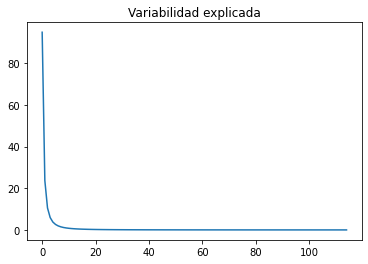

In [11]:
scaler = StandardScaler()
scaler.fit(df_delantero)
df_delantero_transformada =scaler.transform(df_delantero)

U, S, VT = svd(df_delantero_transformada, full_matrices=False)

idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]
plt.plot(idx,func) 
plt.title("Variabilidad explicada")
plt.show()

In [12]:
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
num_components = 21
sum(var_explained[0:num_components])

0.9029400000000002

Podemos observar que al retener unicamente 21 componentes del espacio vectorial transformado, mantenemos más del $90\%$ de la variabilidad o información, lo cual consideramos que es bastante aceptable

In [13]:
df_delantero_transformada = df_delantero_transformada @ VT[:num_components,:].T

In [14]:
df_delantero_transformada.shape

(115, 21)

In [15]:
(U@(S@VT)).shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 174 is different from 115)

### agrupación de datos

Para esto, vamos a utilizar una clustering jerarquico, la principal razón de esta elección, es que no tenemos un número fijo de clusters deseables, sin embargo, queremos que haya bastantes grupos, buscando mantener un equilibrio entre la cantidad de grupos y el tamaño de los mismos.



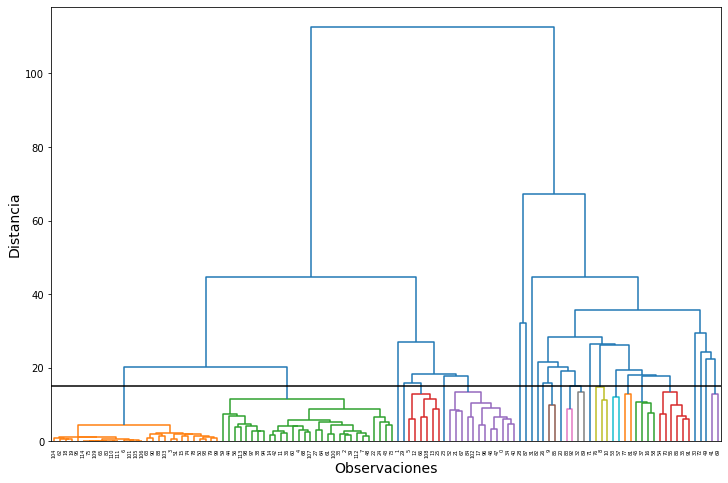

In [16]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

dist = pdist(df_delantero_transformada, metric='euclidean')
Z = linkage(dist, method='ward')

distancia_max = 15

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, ax=ax, color_threshold=distancia_max)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_ylabel('Distancia', fontsize=14)
plt.axhline(y=distancia_max, c='k')
plt.show()

Como se puede notar en la gráfica anterior, al delimitar una distacia máxima de 15, mantendríamos 7 grupos. Sin embargo dos grupos solo contienen un elemento. Los arqueros es la posición más dificil de agrupar debido a la cantidad de jugadores que aparecen.

In [17]:
from scipy.cluster.hierarchy import fcluster
cluster_jerarquico = fcluster(Z, distancia_max, criterion="distance")
print("En el orden inicial, cada registro pertenecería al siguiente cluster:", cluster_jerarquico)

En el orden inicial, cada registro pertenecería al siguiente cluster: [ 5  7  2  1  2  3  1  2 16 10 16  2  3  3  2  1 19  5  1  1 14  5  2  6
  2  3 11  2  8  4 25 26 13  2  5 20  2 19  2  2  5 22  2  2  2 19  5  5
  2 23  1  1  5 17 20 20  2 17 19  2  2  2  1  1  2  1  3  5  2 22 20 21
 24  2  1  1 16 18  1  1  1 18 15 12  5 10 20  9  1 13  1 20 12  1  2  1
  5  2  2  1  2  1  5  1  1  1  1  2  3  1  1  1  2  2  1]


## Recomendacion

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(df_delantero,df_delantero)
cosine_sim = pd.DataFrame(cosine_sim, index=df_delantero.index, columns=df_delantero.index)
cosine_sim

Player ID,1195,1231,1409,1619,1710,1765,1795,3118,3630,3731,...,80061,80181,80979,86168,89328,91126,95703,97612,98769,107853
Player ID,,,,,,,,,,,,,,,,,,,,,
1195,1.000000,0.946367,0.931146,0.921205,0.963936,0.977650,0.989914,0.976688,0.953728,0.979428,...,0.366096,0.553661,0.986003,0.974522,0.329371,0.523492,0.713311,0.884372,0.925955,0.259661
1231,0.946367,1.000000,0.894455,0.925315,0.984447,0.953932,0.933576,0.889732,0.950910,0.930999,...,0.441641,0.570788,0.936896,0.974276,0.406944,0.624472,0.777112,0.881256,0.976531,0.301190
1409,0.931146,0.894455,1.000000,0.972616,0.888642,0.951605,0.909937,0.954907,0.940161,0.947641,...,0.588201,0.749965,0.966516,0.930046,0.549175,0.699752,0.825353,0.973028,0.929765,0.504977
1619,0.921205,0.925315,0.972616,1.000000,0.907472,0.946720,0.898960,0.931093,0.930039,0.930181,...,0.618685,0.761849,0.958267,0.941633,0.603991,0.722071,0.874762,0.963277,0.961362,0.533042
1710,0.963936,0.984447,0.888642,0.907472,1.000000,0.972611,0.956353,0.906383,0.969869,0.958295,...,0.336888,0.490988,0.938770,0.976987,0.301770,0.527456,0.697034,0.846026,0.948210,0.200295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91126,0.523492,0.624472,0.699752,0.722071,0.527456,0.544348,0.499534,0.566979,0.532502,0.495097,...,0.949606,0.923732,0.632286,0.579960,0.876904,1.000000,0.900696,0.797497,0.746888,0.870706
95703,0.713311,0.777112,0.825353,0.874762,0.697034,0.729345,0.695170,0.740907,0.693995,0.688034,...,0.862947,0.916186,0.798111,0.763273,0.845403,0.900696,1.000000,0.900164,0.865801,0.789437
97612,0.884372,0.881256,0.973028,0.963277,0.846026,0.898450,0.856820,0.911241,0.885420,0.882444,...,0.702512,0.829025,0.936813,0.907687,0.674387,0.797497,0.900164,1.000000,0.931684,0.617972


Funcion Recomendadora

In [19]:
def recomendadora(player_id , cosine_sim = cosine_sim):
    
    lista_recomendados = []

    recomendaciones = cosine_sim.loc[player_id, :].sort_values(ascending = False)
    recomendaciones = recomendaciones.iloc[1:11]
    recomendaciones = recomendaciones.index.values

    for i in recomendaciones:
        recomendaciones_nombre = df.loc[df['Player ID'] == i, ['Player Forename', 'Player Surname']]
        lista_recomendados.append(recomendaciones_nombre.iloc[0,:].tolist())

    return lista_recomendados    

In [21]:
recomendadora(17500)
nombre = df.loc[df['Player ID'] == 17500, ['Player Forename', 'Player Surname']]

print(f'Jugadores similares a {nombre.iloc[0,0]} {nombre.iloc[0,1]}: {recomendadora(17500)}')

Jugadores similares a Emmanuel Adebayor: [['Danny', 'Welbeck'], ['Bobby', 'Zamora'], ['Nicklas', 'Bendtner'], ['Sergio', 'Agüero'], ['Peter', 'Odemwingie'], [nan, 'Gervinho'], ['Mario', 'Balotelli'], ['Robbie', 'Keane'], ['Marc-Antoine', 'Fortuné'], ['Luis', 'Suárez']]


In [22]:
similitud = cosine_similarity(df_delantero_transformada, df_delantero_transformada)